<a href="https://colab.research.google.com/github/Saikiranreddy31/Machine-Learning/blob/main/Image_segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, segmentation, color
from sklearn.cluster import KMeans

In [ ]:
image = cv2.imread("/content/images.jpg")


In [ ]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [ ]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)


In [ ]:
print(pixel_values.shape)


(50181, 3)


In [ ]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)


In [ ]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [ ]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

converting ack to the original image

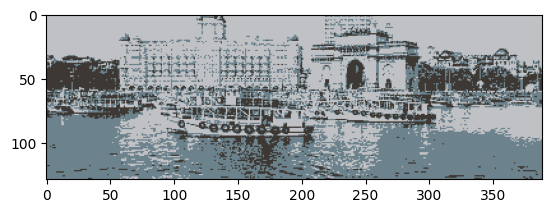

In [ ]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

we can also disable some clusters in the image. For instance, let's disable cluster number 2 and show the original image:

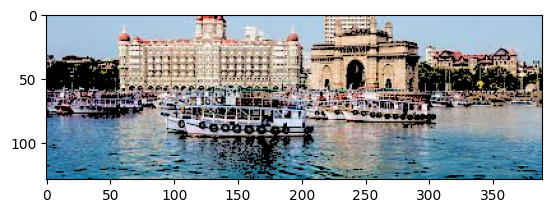

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()